### custom breakdown file for a model as a netcdf

-air sea C flux
-air sea SO flux
-air sea export
-air sea annual surface DIC
-air sea annual S (surface)
-the above two at 100m and for SO
-run in a notebook format


In [6]:
import matplotlib.pyplot as plt
import glob
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS')
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
import scendict as sc
import breakdown as bp
import plotr as pr
from importlib import reload
reload(bp)

<module 'breakdown' from '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS/breakdown.py'>

In [12]:

#------CHANGE THIS TO WHAT YOU WANT TO EXTRACT
extract = False #extracting?
graph = True #plotting?
sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/' #results directory
fnam = 'Cflx_comparison.png' ## filename for resulting plot
#tms = ['TOM12_TJ_1AS7','TOM12_TJ_1AS6','TOM12_TJ_1BS2', 'TOM12_TJ_3AS1','TOM12_DW_WE43', 'TOM12_DW_GA01'] ##models to plot
tms = ['TOM12_TJ_1AS6','TOM12_TJ_1AS7','TOM12_DW_WE43', 'TOM12_DW_GA01'] ##models to plot
tms_te = ['TOM12_TJ_1AS7'] ##models to extract
descs = ['1AS6: TJ(MET), Hist. ozone, \n SSP 1-2.6, restart@ WE43(1948) (UNSTABLE)',
        '1AS7: TJ(MET), Hist. ozone, \n SSP 1-2.6, restart@ WE43(1948)',\
         'WE43: DW(ERA5)',
         'GA01: DW(NCEP), GCB run']#descriptions of models in tm
cols = [sc.scen['1A']['color'], 'r', 'grey', 'b'] #colours for models in tm



In [13]:
reload(bp)
if extract: 
    for tm in tms_te:
        bp.breakdown_maker(tm, bdflag = 'cflx', resDir = sdir)



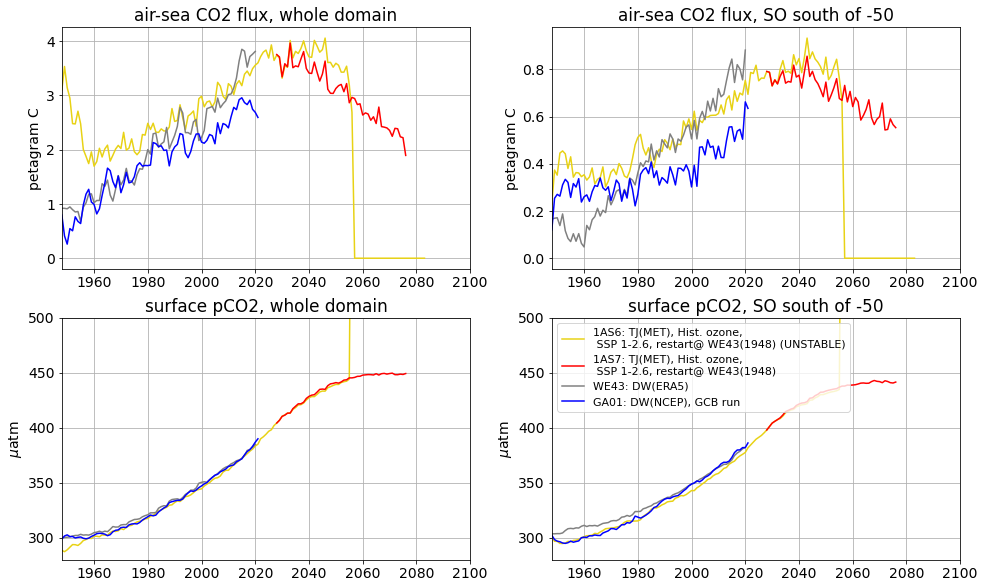

In [14]:
### open the datasets
reload(pr)
if graph:
    dsets = []

    for tm in tms:
        w = glob.glob(f'{sdir}*{tm}*')
        ds = xr.open_dataset(w[0])
        dsets.append(ds)
    pr.plot_carbon(dsets, cols, descs, sdir, fnam, tstart = 1948, tend = 2100, tendatm = 500)
